# VIP@AINE AI

## **BY - SUYOG SANTOSH NEMADE**
## **Project** - Image Classification Of Covid-19 positive and negative patients from X-ray images Using Deep Learning


### **About the Project**: The outbreak of COVID-19 has had an immense impact on world health and daily life in many countries. The first imaging procedure that played an important role in COVID-19 treatment was the chest X-ray. Radiological imaging is often used as a method that emphasizes the performance of chest X-rays. Recent findings indicate the presence of COVID-19 infections in the patients with irregular findings on chest X-rays. There are many reports on this topic that include machine learning strategies for the identification of COVID-19 using chest X-rays.

### This project uses radiological imaging to determine whether the scanned patient has COVID-19 or not.

### **Aim**: With the Chest X - Ray dataset, develop a Deep Learning Model to classify the X Rays of Healthy vs Corona positive patients.
### **Objectives/Exercises**:

    Import the dataset in python Notebook
    Explore the dataframe
    Perform data transformation to preprocess the images to convert the images to the same size and greyscale.
    Perform normalization techniques on the images
    Split the dataset into training and testing sets.
    Create a Convolution Neural Network (CNN) model to classify the images into positive and negative COVID-19 infections.
    Test the CNN model and critically evaluate the performance of the model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import os
import cv2
import random
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
path = "/content/drive/MyDrive/CSV FILES/COVID19 DATA"
DATADIR   = (path)

In [ ]:
CATEGORIES = ["Covid Negative","Covid Positive"]
IMG_SIZE = 150

## **Reading Data**

In [ ]:
training_data = []
for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_name = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_name])
            except Exception as e:
                print(e)

In [ ]:
training_data[0][0].shape

(150, 150)

In [ ]:
len(training_data)

1973

In [ ]:
random.shuffle(training_data) # Shuffling the data


# Viewing the data


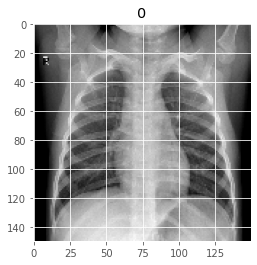

In [ ]:
plt.imshow(training_data[100][0], cmap="gray")
plt.title(training_data[100][1])
plt.show()

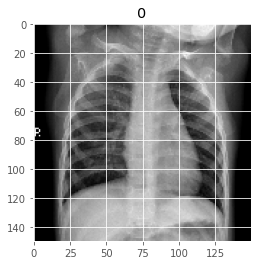

In [ ]:
plt.imshow(training_data[301][0], cmap="gray")
plt.title(training_data[301][1])
plt.show()


# **Creating Model and Layers**


In [ ]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters = 4, kernel_size = (5,5), activation='relu' , input_shape = (150,150,1)))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 4, kernel_size = (7,7), activation='relu'))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 146, 146, 4)       104       
_________________________________________________________________
average_pooling2d_2 (Average (None, 73, 73, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 67, 4)         788       
_________________________________________________________________
average_pooling2d_3 (Average (None, 33, 33, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4356)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4356)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

### **Separating X value and y values. X denotes the chest xray images and y denotes the respective class - covid-19 positive or covid-19 negative**

In [ ]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)
X = np.array(X).reshape(-1,150,150,1)
y = np.array(y)


### Splitting the data into train and test datasets


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
X_train.shape

(1578, 150, 150, 1)

In [ ]:
value1 = random.randint(0,1492)
print(value1)

1482


In [ ]:


value2 = random.randint(0,1492)
print(value2)



167



### Fitting the model

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 1, validation_split=0.1)

Epoch 1/20
1420/1420 [==============================] - 32s 22ms/step - loss: 0.7400 - acc: 0.8690 - val_loss: 0.1320 - val_acc: 0.9557
Epoch 2/20
1420/1420 [==============================] - 29s 20ms/step - loss: 0.1757 - acc: 0.9451 - val_loss: 0.0773 - val_acc: 0.9747
Epoch 3/20
1420/1420 [==============================] - 29s 20ms/step - loss: 0.0967 - acc: 0.9746 - val_loss: 0.1610 - val_acc: 0.9557
Epoch 4/20
1420/1420 [==============================] - 43s 30ms/step - loss: 0.1617 - acc: 0.9472 - val_loss: 0.1002 - val_acc: 0.9557
Epoch 5/20
1420/1420 [==============================] - 38s 27ms/step - loss: 0.0829 - acc: 0.9775 - val_loss: 0.0392 - val_acc: 0.9810
Epoch 6/20
1420/1420 [==============================] - 27s 19ms/step - loss: 0.0452 - acc: 0.9880 - val_loss: 0.0848 - val_acc: 0.9557
Epoch 7/20
1420/1420 [==============================] - 27s 19ms/step - loss: 0.0909 - acc: 0.9690 - val_loss: 0.0273 - val_acc: 0.9937
Epoch 8/20
1420/1420 [==========================

In [ ]:
print(type(X_test))

<class 'numpy.ndarray'>


In [ ]:
X_test.shape

(395, 150, 150, 1)

In [ ]:
test1 = random.randint(0,372)
print(test1)

204



### Plotting graph for loss and validation loss of our model


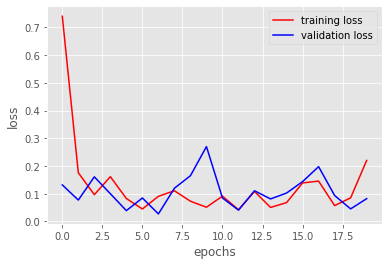

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


### Plotting graph for accuracy and validation accuracy of our model


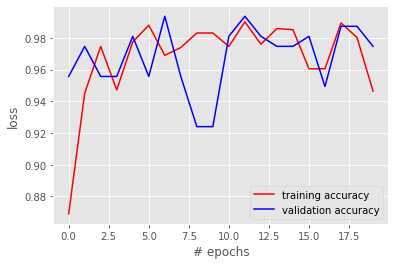

In [ ]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],'b',label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


### Evaluating our model

In [ ]:
print(model.evaluate(X_test,y_test))

13/13 [==============================] - 2s 132ms/step - loss: 0.0860 - acc: 0.9797
[0.08596589416265488, 0.9797468185424805]
